Christian sutton
10/5/2020
Module 5

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import math
Tdata = pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod5/train.csv")

# Problem a  
**(a.) [50 pts] Preprocess the data, impute missing values as you see fit, and remove features that you see useless.**  
  
    
      
      

In [2]:
Tdata.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# data is missing some (Age , Cabin, Embarked )
Tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Checking unique text values
for col in Tdata.columns:
    if Tdata[col].dtype == np.object:
        print(col, Tdata[col].unique())

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'T

In [5]:
Tdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# some Age values are less than 1, check how many
for i in Tdata.iloc[:,5]:
    if i < 1 : 
        print(i)
        

0.83
0.92
0.75
0.75
0.67
0.42
0.83


In [7]:
# correct ages to be greater than 1
for i in range(0,891):
    if Tdata.iloc[i,5] < 1:
        Tdata.iloc[i,5] = Tdata.iloc[i,5]*100

In [8]:
# drop Nan age rows 
Tdata= Tdata.dropna(axis =0, subset=['Age'])

In [9]:
# Drop some features because I just don't feel they are usefull 
Tdata = Tdata.drop(columns= ['Name', 'Cabin', 'Ticket', 'Embarked', 'PassengerId'])

In [10]:
# One hot encode remaining features
Tdata1 = pd.get_dummies(Tdata)

In [11]:
Tdata1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
Survived,1.000000,-0.359653,-0.017010,-0.017358,0.093317,0.268189,0.538826,-0.538826
Pclass,-0.359653,1.000000,-0.361164,0.067247,0.025683,-0.554182,-0.155460,0.155460
Age,-0.017010,-0.361164,1.000000,-0.271786,-0.132686,0.100671,-0.098104,0.098104
SibSp,-0.017358,0.067247,-0.271786,1.000000,0.383820,0.138329,0.103950,-0.103950
Parch,0.093317,0.025683,-0.132686,0.383820,1.000000,0.205119,0.246972,-0.246972
Fare,0.268189,-0.554182,0.100671,0.138329,0.205119,1.000000,0.184994,-0.184994
Sex_female,0.538826,-0.155460,-0.098104,0.103950,0.246972,0.184994,1.000000,-1.000000
Sex_male,-0.538826,0.155460,0.098104,-0.103950,-0.246972,-0.184994,-1.000000,1.000000


In [12]:
# Drop low correlation features
Tdata1 = Tdata1.drop(columns= ['SibSp','Age','Parch'])

In [13]:
# Training and testing datasets
X,Y = Tdata1.iloc[:,[1,2,3]], Tdata1.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=10)

In [14]:
# 4 classifiers were tested
# Parameter to vary for classifers
A = (2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 5e1, 1e2)
B = (1, 3, 8, 15, 20, 50, 1e2, 5e2, 1e3)
C = (1, 3, 8, 15, 20, 50, 1e2, 5e2, 1e3)
D = (1e-3,1e-2, 1e-1, 1e0, 2, 5, 1e1, 5e1, 1e2)


FPR1, TPR1,FPR2, TPR2,FPR3, TPR3,FPR4, TPR4 = [],[],[],[],[],[],[],[]

In [15]:
print("Logistic Regression")
for c in A:
    pipe_l1 = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=10,
                                               C=c,
                                               max_iter=100))
    pipe_l1.fit(X_train, Y_train)
    Y_pred1 = pipe_l1.predict(X_test)
    tn1, fp1, fn1, tp1 = confusion_matrix(Y_test, Y_pred1).ravel()
    TPR1 += [tp1/(tp1+fn1)]  # Pd
    FPR1 += [fp1/(fp1+tn1)]  # Pf
   
    print(f'Test Accuracy= {pipe_l1.score(X_test, Y_test):.3f}, A={c:13.5f}, TPR1 {TPR1[-1]:.3f}, FPR1 {FPR1[-1]:.3f}')
print("")
print("RandomForest")
print("Value used will be 20 estimators")
for i in B:
    pipe_l2 = make_pipeline(StandardScaler(),
                            RandomForestClassifier(20,
                                                   random_state=10))
    pipe_l2.fit(X_train, Y_train)
    Y_pred2 = pipe_l2.predict(X_test)
    tn2, fp2, fn2, tp2 = confusion_matrix(Y_test, Y_pred2).ravel()
    TPR2 += [tp2/(tp2+fn2)]  # Pd
    FPR2 += [fp2/(fp2+tn2)]  # Pf
    print(f'Test Accuracy= {pipe_l2.score(X_test, Y_test):.3f}, B={i:13.5f}, TPR2 {TPR2[-1]:.3f}, FPR2 {FPR2[-1]:.3f}')
print("")
print("MLP classifier")    
for i in C:
    pipe_l3 = make_pipeline(StandardScaler(),
                            MLPClassifier(int(i),random_state=10, solver='adam', n_iter_no_change= 100))
    pipe_l3.fit(X_train, Y_train)
    Y_pred3 = pipe_l3.predict(X_test)
    tn3, fp3, fn3, tp3 = confusion_matrix(Y_test,Y_pred3).ravel()
    TPR3 += [tp3/(tp3+fn3)]  # Pd
    FPR3 += [fp3/(fp3+tn3)]  # Pf
    print(f'Test Accuracy= {pipe_l3.score(X_test, Y_test):.3f}, C={i:13.5f}, TPR3 {TPR3[-1]:.3f}, FPR3 {FPR3[-1]:.3f}')
    
print("")
print("SVM - SVC")    
for i in D:
    pipe_l4 = make_pipeline(StandardScaler(),
                            LinearSVC(C=i,random_state=10,))
    pipe_l4.fit(X_train, Y_train)
    Y_pred4 = pipe_l3.predict(X_test)
    tn4, fp4, fn4, tp4 = confusion_matrix(Y_test, Y_pred4).ravel()
    TPR4 += [tp4/(tp4+fn4)]  # Pd
    FPR4 += [fp4/(fp4+tn4)]  # Pf
    print(f'Test Accuracy= {pipe_l4.score(X_test, Y_test):.3f}, D={i:13.5f}, TPR4 {TPR4[-1]:.3f}, FPR4 {FPR4[-1]:.3f}')

Logistic Regression
Test Accuracy= 0.750, A=      0.20000, TPR1 0.667, FPR1 0.190
Test Accuracy= 0.750, A=      0.50000, TPR1 0.667, FPR1 0.190
Test Accuracy= 0.750, A=      0.80000, TPR1 0.667, FPR1 0.190
Test Accuracy= 0.750, A=      1.00000, TPR1 0.667, FPR1 0.190
Test Accuracy= 0.750, A=      2.00000, TPR1 0.667, FPR1 0.190
Test Accuracy= 0.750, A=      5.00000, TPR1 0.667, FPR1 0.190
Test Accuracy= 0.750, A=     10.00000, TPR1 0.667, FPR1 0.190
Test Accuracy= 0.750, A=     50.00000, TPR1 0.667, FPR1 0.190
Test Accuracy= 0.750, A=    100.00000, TPR1 0.667, FPR1 0.190

RandomForest
Value used will be 20 estimators
Test Accuracy= 0.750, B=      1.00000, TPR2 0.733, FPR2 0.238
Test Accuracy= 0.750, B=      3.00000, TPR2 0.733, FPR2 0.238
Test Accuracy= 0.750, B=      8.00000, TPR2 0.733, FPR2 0.238
Test Accuracy= 0.750, B=     15.00000, TPR2 0.733, FPR2 0.238
Test Accuracy= 0.750, B=     20.00000, TPR2 0.733, FPR2 0.238
Test Accuracy= 0.750, B=     50.00000, TPR2 0.733, FPR2 0.238
Tes

In [16]:
# examine Test data 
TdataTEST = pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod5/test.csv")

In [17]:
TdataTEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
# Drop same colmuns as train dataset 
TdataTEST = TdataTEST.drop(columns = ['Name','SibSp','Parch','Ticket','Cabin','Embarked','Age'])

In [19]:
# One Hot Enconde remaining data
TdataTEST = pd.get_dummies(TdataTEST)

In [20]:
TdataTEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Fare           417 non-null float64
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
dtypes: float64(1), int64(2), uint8(2)
memory usage: 10.7 KB


In [21]:
# Correct missing Fare with mean value
TdataTEST['Fare']=TdataTEST['Fare'].fillna(TdataTEST.mean()[2])

In [22]:
# Make predictions on test data using RandomeForest Classifier set to 20 estimators
TestPred = pipe_l2.predict(TdataTEST.iloc[:,[1,2,3]])

# problem b
**[50 pts] Submit your predictions to Kaggle for the test dataset and report your accuracy in your submission. (You will need an account at Kaggle – use a dummy email address to protect your school email address, etc.) For your reference, I achieved 79% using my preprocessing pipeline and a Random Forest classifier. This is not the best, as in Kaggle there are better results. Kaggle also has some results with 100% accuracy which cannot be taken as honest submissions in my opinion.**  
  
    

In [23]:
# Build solution to submit to Kaggle
solution = {'PassengerId': TdataTEST.iloc[:,0], 'Survived':TestPred}
final1 = pd.DataFrame(data= solution)


In [24]:
# This solution was scored by kaggle as 77.2%
# final1.to_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod5/solutionSutton.csv" , index= False)

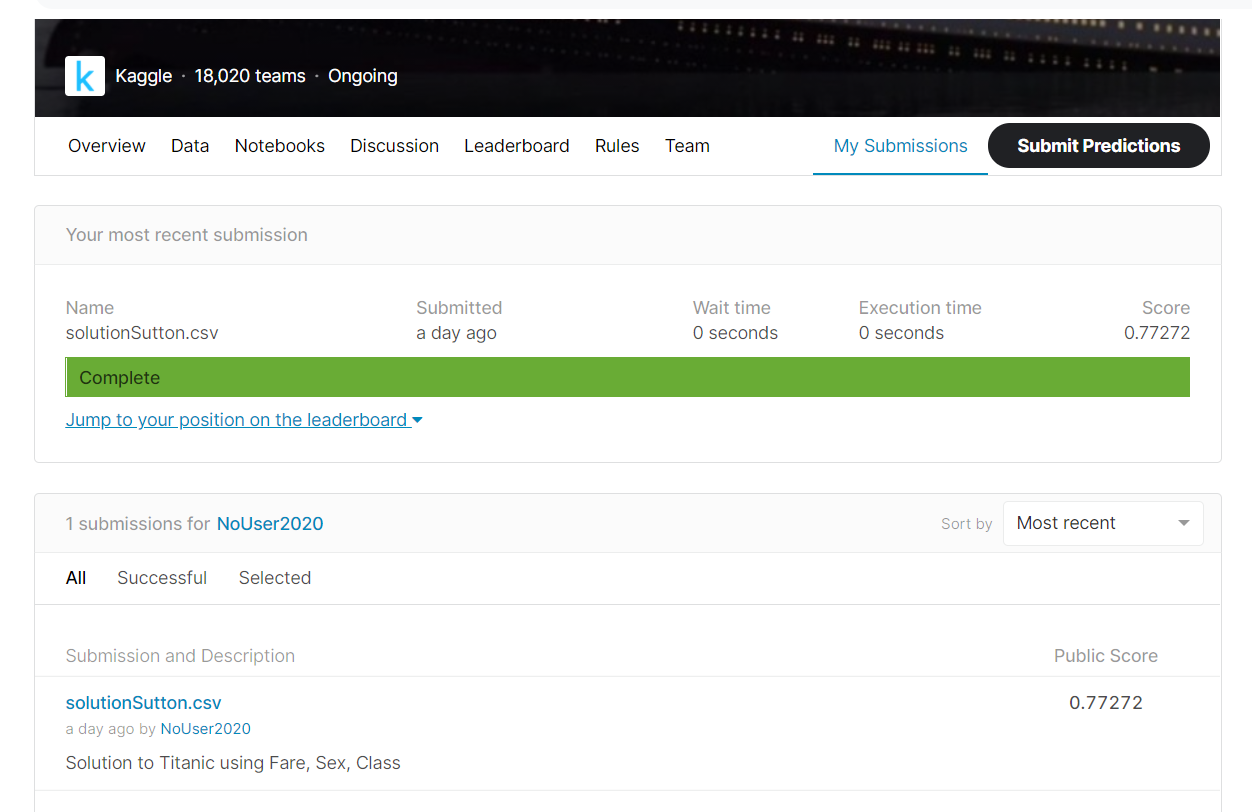